# Q1

Consider C to be the center of the optimal clustering. (C is hence not necessarily a datapoint).
Consider A to be the datapoint closest to C.

Now, for any other datapoint B present in the cluster of center C, ${d(C,A) + d(C,B) \geq d(A,B)}$, where d() is the L2 norm $\text{[By Triangle Inequality] ----- Eq 1}$

As we took A to be the closest datapoint to C, ${d(C,A) \leq d(C,B)}$. $\text{----- Eq 2}$

Thus, we can say that $2 \times d(C,B) \geq d(A,B)$ $\text{----- Eq 3}$

Now, we can say that it is very likely that our KMeans will have A as the center, as it is closest to the datapoint.

KMeans objective function is $\sum[d^2(c,x)]$, which is the square of the L2 norm between all points and their closest centers.

By Eq 3, we can say that $4 \times d^2(C,B) \geq d^2(A,B)$.

Thus, $4 \times \sum[d^2(C,B)] \geq \sum[d^2(A,B)]$.

This proves that for the k-means problem, there is at most a factor of four ratio between the optimal value when
we either require all cluster centers to be data points or allow arbitrary points to be centers.

# Q2

Consider a random variable X that takes value 0 or 1. Let the probability of $\text{X = 0}$ be $\text{P}$.<br>
Thus, the probability of $\text{X = 1}$ is $\text{1 - P}$.<br>


$E[X] = \sum x \times P[X=x]$<br>
$E[X] = \sum 0 \times P[X=0] + 1 \times P[X=0]$<br>
$E[X] = 1 - P$<br>

Markov's Inequality gives: $P[X \geq a] \leq \frac{E[X]}{a}$<br>
Take $a = 1$

By Markov's Inequality (using a=1):

$P[X \geq 1] \leq \frac{E[X]}{1}$<br>
$P[X \geq 1] \leq 1 - P$<br>

But for our Random Variable X: <br>
$P[X \geq 1] = P[X = 1] = 1 - P$<br>[As X takes 0 or 1 values only]<br>

Thus, Markov's Inequality is tight here.<br>

As Markov's Inequality is tight only for a specific value of a and not all values, we need other inequalities like Chernoff and Chebyshev. They also serve different purposes as they are defined to give probabilities of X lying in specific intervals different from Markov's Inequality. If we have only the expectation, Markov's inequlity gives the best bound, but if we have more information, like the variance, then we can use Chebyshev for a better bound.



# Q3

# Clustering the MNIST Dataset

### Reading the MNIST Dataset

Code to read MNIST (cells 1 and 2) was taken from the source: https://www.kaggle.com/code/hojjatk/read-mnist-dataset/notebook

In [ ]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

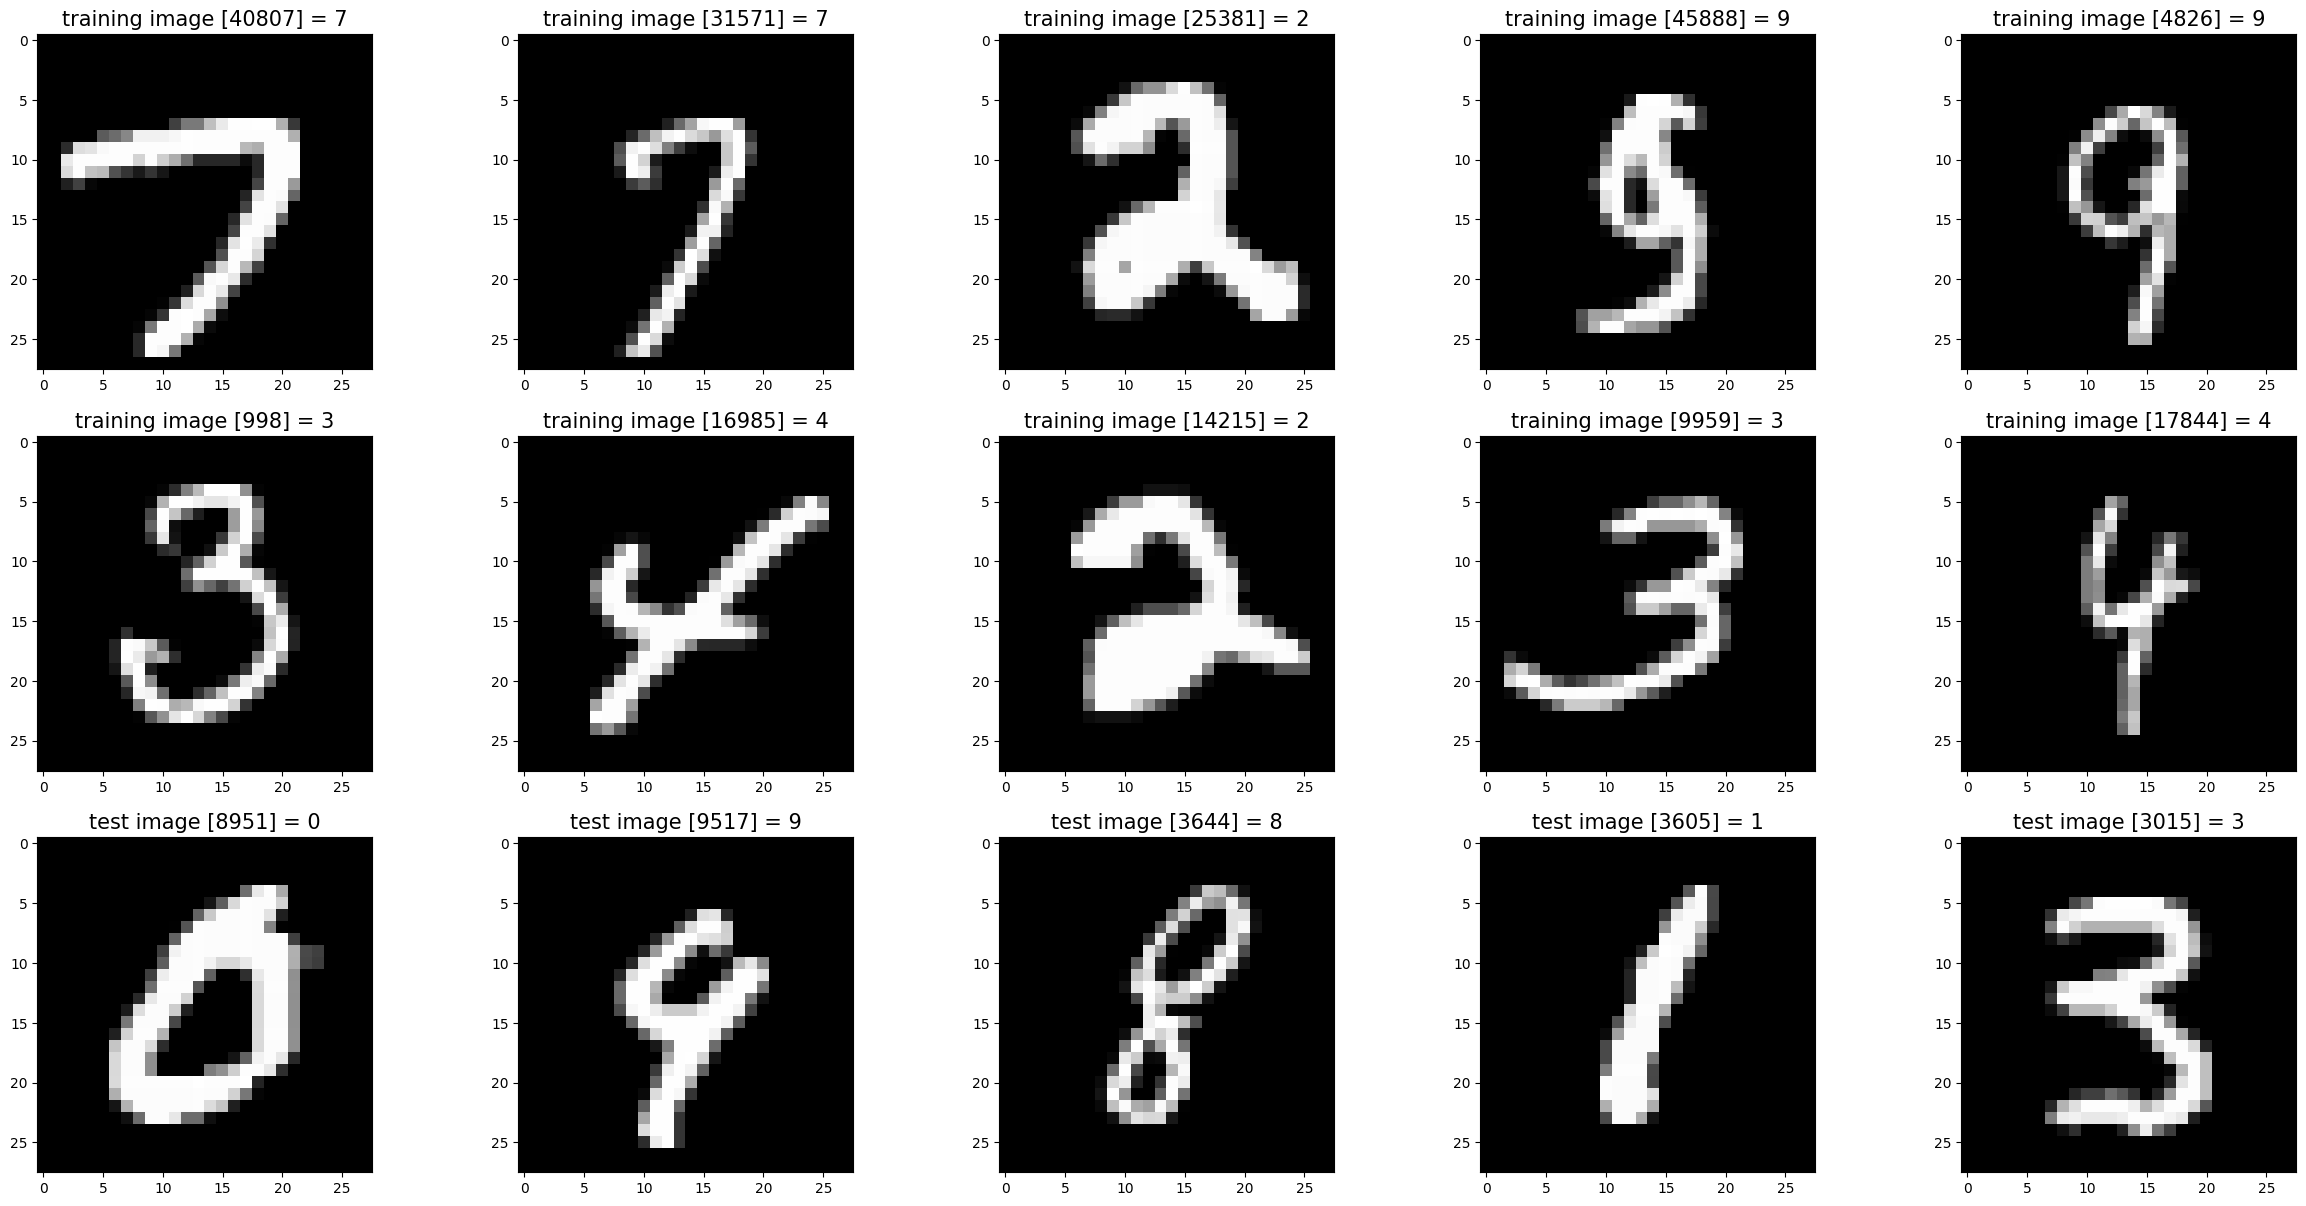

In [ ]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = './'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_test = x_test.reshape(10000,28*28)
print(x_test.shape)

(10000, 784)


In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 784)
(10000,)


In [ ]:
data = x_test
labels = y_test

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

### Defining necessary functions

In [ ]:
def dist(p1, p2):
    # print(p1.shape)
    # print(np.linalg.norm(p1-p2, ord=2))
    return np.linalg.norm(p1-p2, ord=2)

In [ ]:
dist(data[0],data[1])

2265.1723996199494

In [ ]:
dist(data[0].flatten(),data[1].flatten())

2265.1723996199494

In [ ]:
def closest_center_dist(point, centers):
    d = None
    cc = None
    for center in centers:
        x = dist(point,center)
        if d is None:
            d = x
            cc = center
        elif x < d :
            d = x
            cc = center
    return d, cc

In [ ]:
data.shape

(10000, 784)

### K-Center

In [ ]:
np.random.seed(42)
centers = [data[np.random.randint(0,10000)]]

In [ ]:
def KCenter(data, centers):
    for i in range(9):
        print("Finding center:",i+2)
        d = None
        cc = None
        for point in data:
            x, xcc = closest_center_dist(point,centers)
            if d is None:
                d = x
                cc = point
            elif x > d:
                d = x
                cc = point
        centers.append(cc)
    return centers

centers = KCenter(data,centers)

Finding center: 2
Finding center: 3
Finding center: 4
Finding center: 5


Finding center: 6
Finding center: 7
Finding center: 8
Finding center: 9
Finding center: 10


In [ ]:
len(centers)

10

### Centers of K-Center algorithm

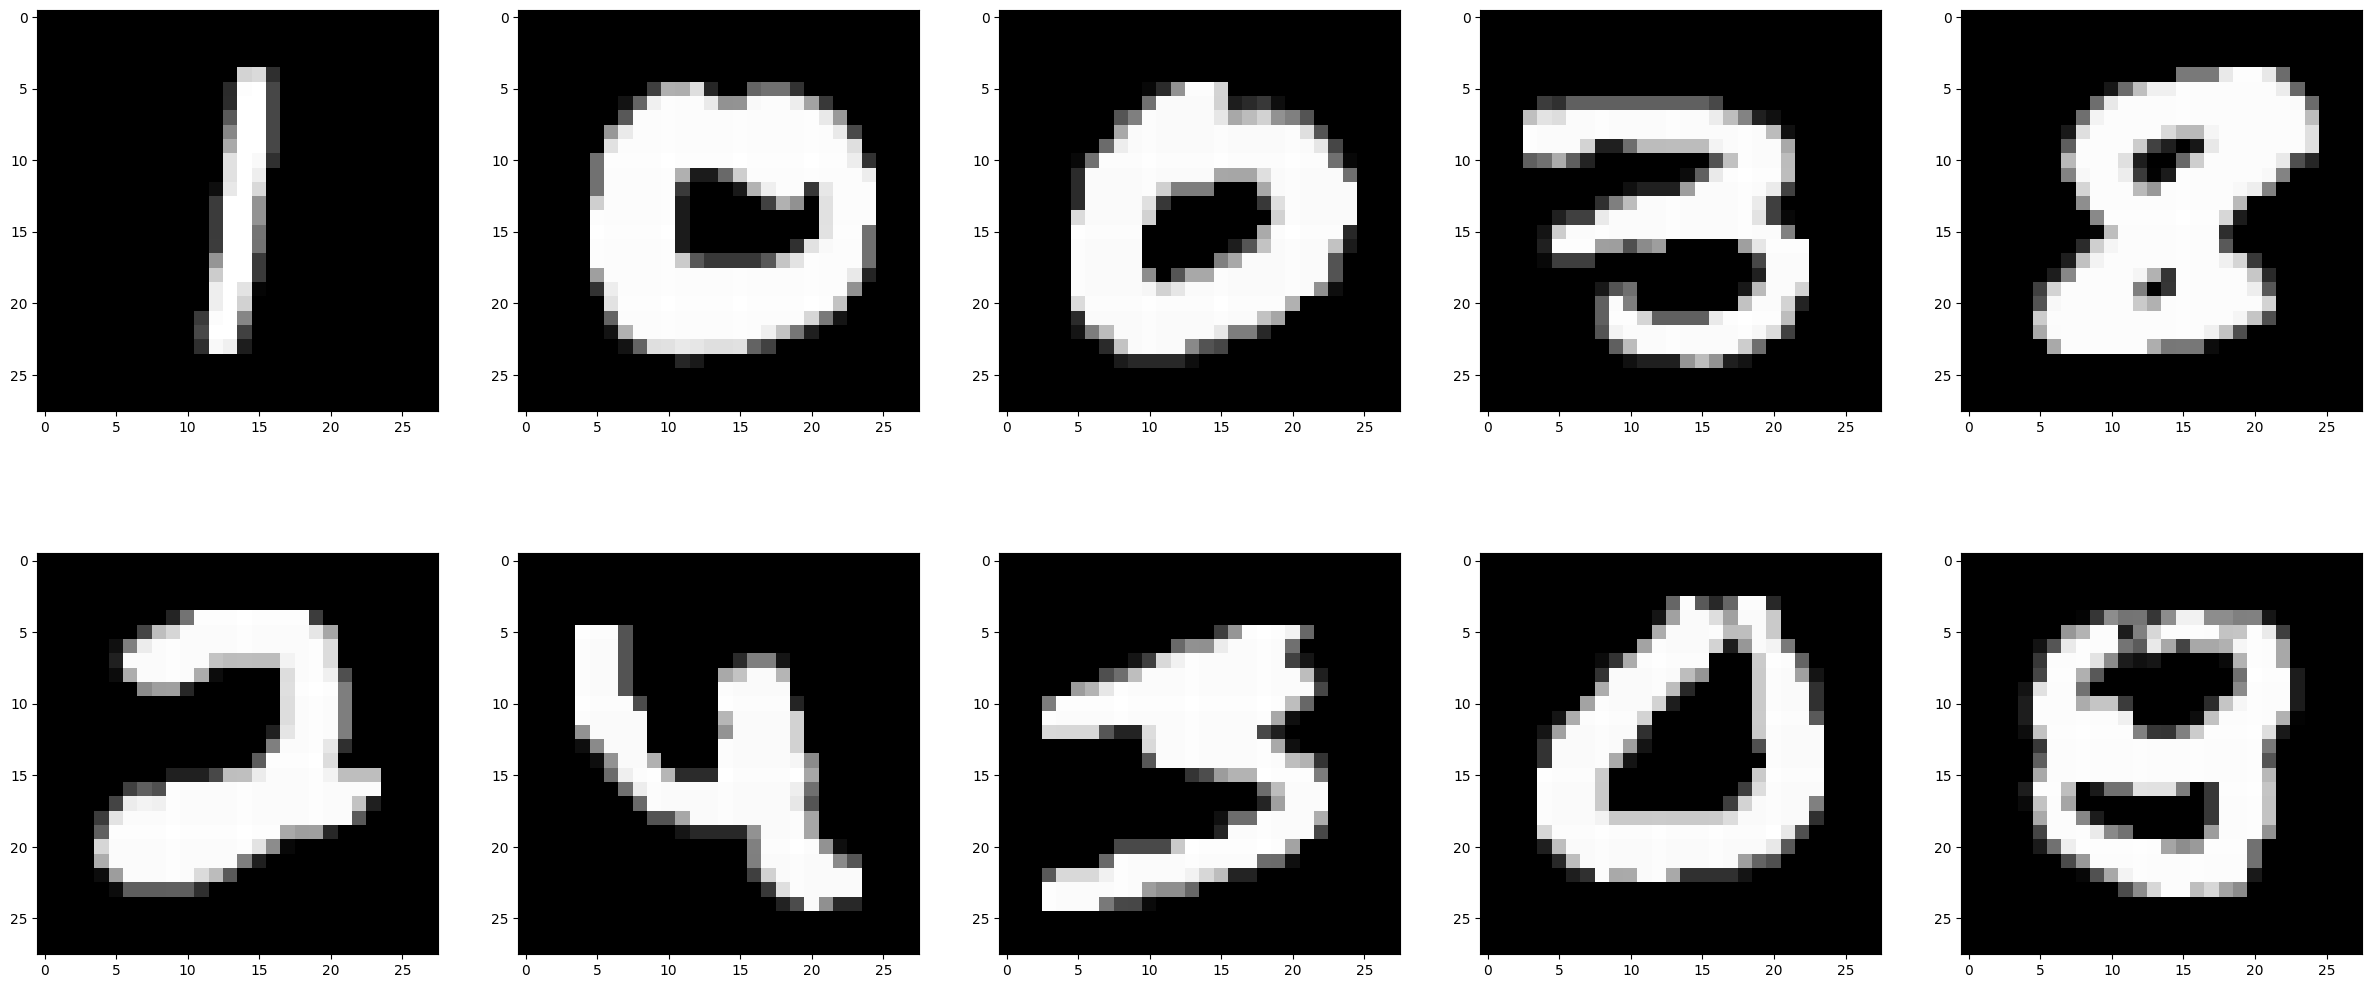

In [ ]:
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    images_2_show.append(centers[i].reshape(28,28))
    titles_2_show.append('')
show_images(images_2_show, titles_2_show)

### Result of K-Center

In [ ]:
from sklearn.metrics import rand_score

def clustering_result(data, centers):
    confusion_mat = np.zeros((10, 10))
    y_pred = [] # contains the closest center index of every point
    # y_pred need not store the actual digit indicated by majority points in the center as rand_score gives the same output for 2 shuffled arrays

    for i,point in enumerate(data):
        d,cc = closest_center_dist(point,centers)
        for j in range(len(centers)):
            if(np.array_equal(centers[j],cc)):
                confusion_mat[j][labels[i]]+=1
                y_pred.append(j)

    confusion_mat = confusion_mat.astype(int)


    print("Cluster wise labels:")
    print(confusion_mat)

    print()
    print("Majority labels in each cluster:")
    pred_labels = confusion_mat.argmax(axis=1)
    print(pred_labels)

    print()
    rand = rand_score(y_pred,labels)
    print("Rand Index:",rand)
    return confusion_mat, pred_labels, rand

print("K-Center results")
confusion_mat, pred_labels, rand = clustering_result(data, centers)

K-Center results
Cluster wise labels:
[[ 12 608  44  90  66  63  51  82  89  89]
 [126   0  10  18  10  36  45   6  17   3]
 [325   5  10  46   8  40  44  57  10  14]
 [  0   0   0  21   1   3   0   1   1   1]
 [297 476 673 700 630 672 673 743 765 699]
 [ 27  26 247  27  22   3  75  37  12  28]
 [  2  16  15   2 225   1  26  47   5 139]
 [ 22   4  15 103  16  67   6  54  73  36]
 [169   0  17   2   1   7  38   1   0   0]
 [  0   0   1   1   3   0   0   0   2   0]]

Majority labels in each cluster:
[1 0 0 3 8 2 4 3 0 4]

Rand Index: 0.5727973397339734


### K-Means++

Defining the lloyds function

In [ ]:
def lloyds(data, centers):
    for j in range(5): # 5 iterations are run, though one or two are enough
        print("Iteration:",j+1)
        closest_center = [[],[],[],[],[],[],[],[],[],[]]

        for point in data:
            d, cc = closest_center_dist(point, centers)
            for i in range(len(centers)):
                if(np.array_equal(centers[i],cc)):
                    closest_center[i].append(point)
        for i in range(10):
            centers[i] = np.mean(np.stack(closest_center[i],axis=0),axis=0)
    return centers

Defining the KMeans++ function

In [ ]:
def KMeans_plus_plus(data, centers):
    for i in range(9):
        print("Finding cetner",i+2)
        prob = []
        s = 0
        for point in data:
            p, cc = closest_center_dist(point, centers)
            prob.append(p**2)
            s += p**2
        prob/=s

        new_center = np.random.choice(np.arange(0,10000), p=prob)
        centers.append(data[new_center])
    centers = lloyds(data, centers)
    return centers

Doing KMeans++ clustering

In [ ]:
np.random.seed(42)
centers = [data[np.random.randint(0,10000)]]

centers = KMeans_plus_plus(data, centers)

Finding cetner 2
Finding cetner 3
Finding cetner 4
Finding cetner 5
Finding cetner 6
Finding cetner 7
Finding cetner 8
Finding cetner 9
Finding cetner 10
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


### Centers of K-Means algorithm

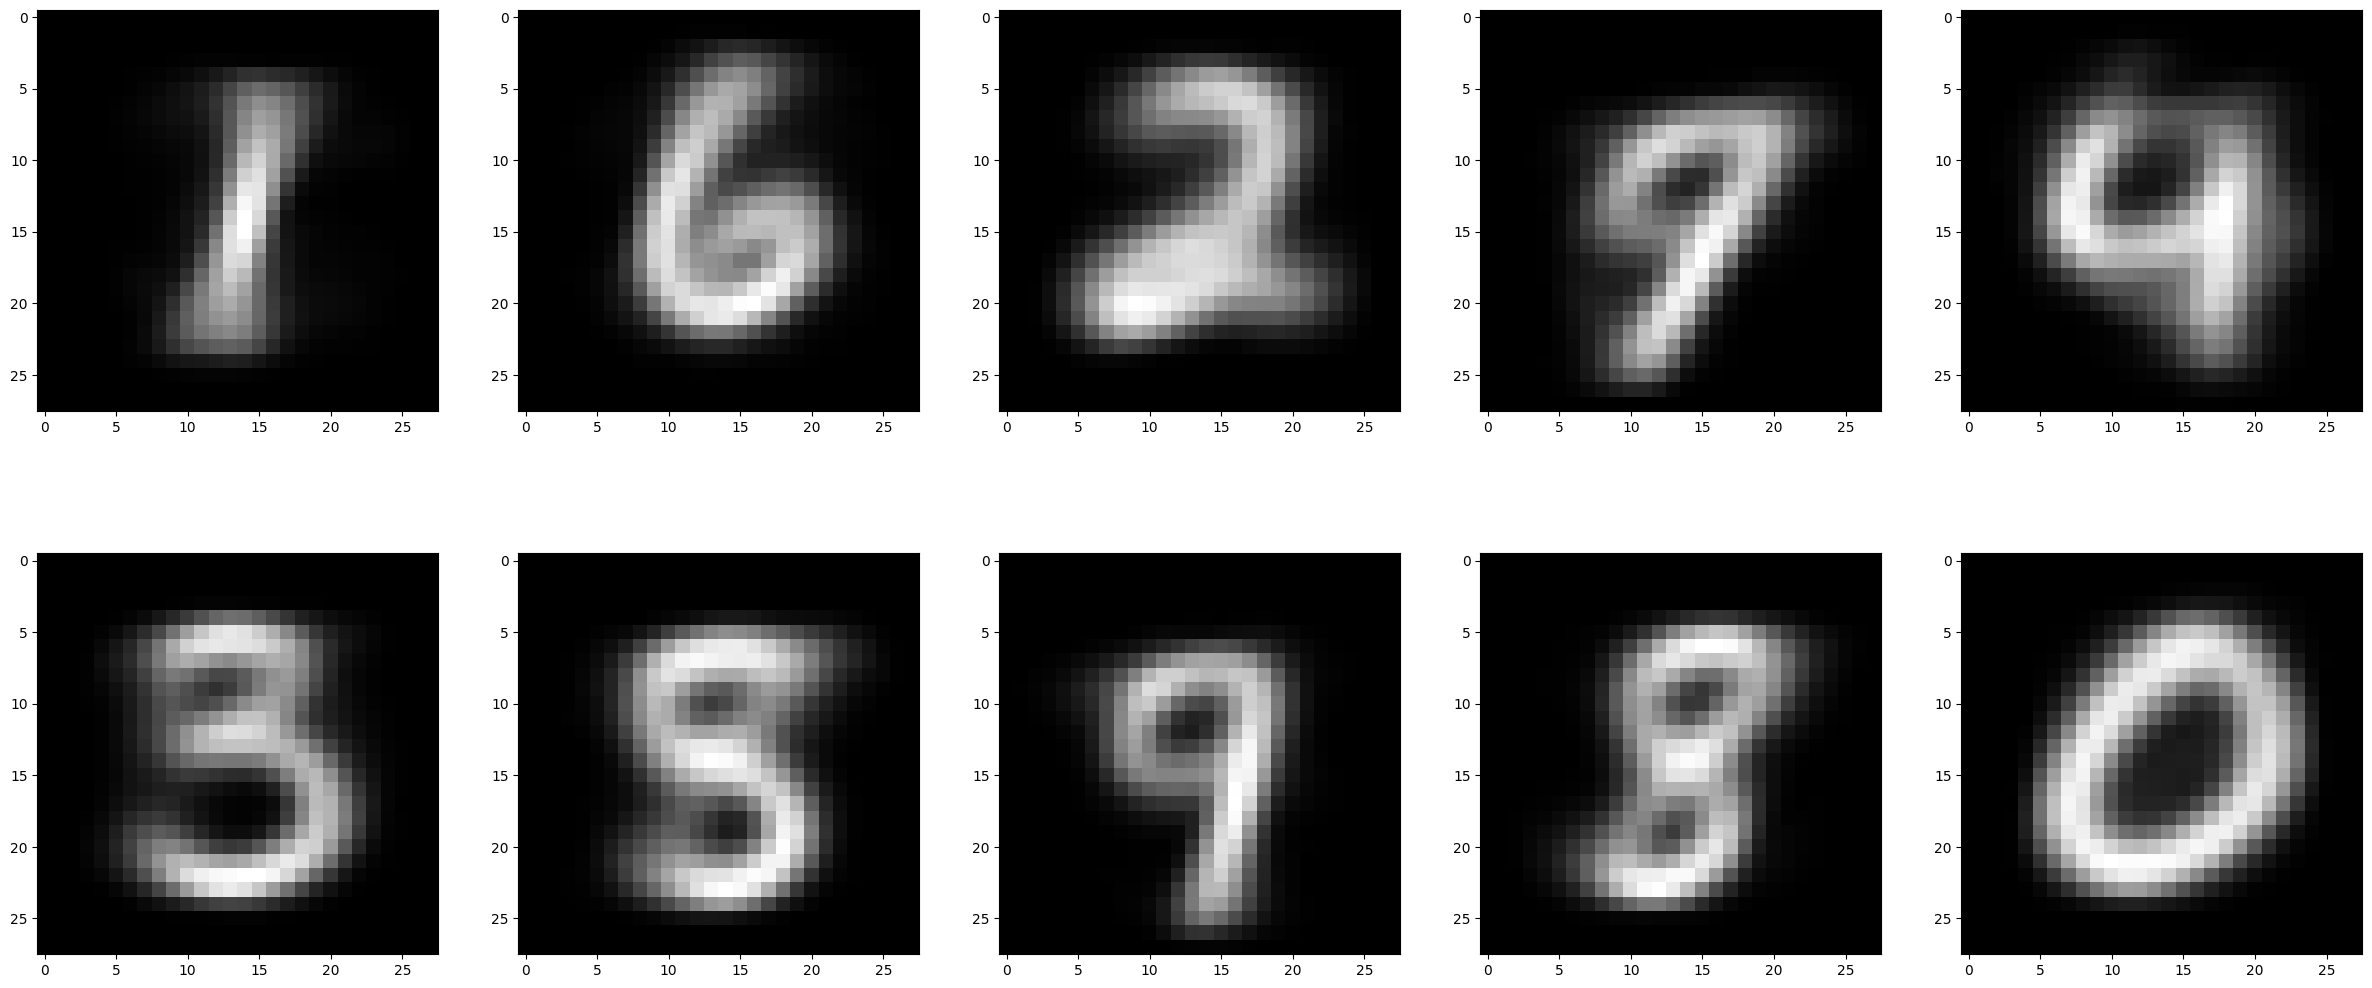

In [ ]:
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    images_2_show.append(centers[i].reshape(28,28))
    titles_2_show.append('')
show_images(images_2_show, titles_2_show)

### Result of K-Means++

In [ ]:
confusion_mat, pred_labels, rand = clustering_result(data, centers)

Cluster wise labels:
[[   1 1087  120   48   24   80   40   64   52   20]
 [  59    4   33   12   39   36  704    1   10    4]
 [   8   36  708   43    3    8    9   19   12    2]
 [  13    1   13   12  268  161    0  431   73  258]
 [  14    0   25    3  360   12  149   47    6  175]
 [  72    1   40  510    0  183    3    0   49    5]
 [   7    3    6  157    2  197    1    0  259   11]
 [   2    1    8   19  284   36    0  462   20  516]
 [  12    2   53  203    0  171    6    3  484   10]
 [ 792    0   26    3    2    8   46    1    9    8]]

Majority labels in each cluster:
[1 6 2 7 4 3 8 9 8 0]

Rand Index: 0.8866201620162016


In [ ]:
data.shape

(10000, 784)

### Single Linkage Clustering

In [ ]:
result_array = [[i] for i in range(10000)]

In [ ]:
from scipy.spatial.distance import cdist
distmat = cdist(data,data)
np.fill_diagonal(distmat, np.inf)
print(distmat.shape)

(10000, 10000)


In [ ]:
# Takes nearly 30 - 40 minutes to execute
ss = 10000
while ss>10:
    idx = np.argmin(distmat,axis=None)
    print(ss) # Prints to get an idea of the amount of execution done
    ss -= 1
    r = idx//ss
    c = idx % ss

    for i in range(distmat.shape[0]):
        if i != r:
            new_dist = min(distmat[r][i], distmat[c][i])
            distmat[r][i] = new_dist
            distmat[i][r] = new_dist
            
    distmat = np.delete(distmat,c,axis=0)
    distmat = np.delete(distmat,c,axis=1)
    result_array[r].extend(result_array[c])
    result_array.pop(c)


10000
9999
9998
9997
9996
9995
9994
9993
9992
9991
9990
9989
9988
9987
9986
9985
9984
9983
9982
9981
9980
9979
9978
9977
9976
9975
9974
9973
9972
9971
9970
9969
9968
9967
9966
9965
9964
9963
9962
9961
9960
9959
9958
9957
9956
9955
9954
9953
9952
9951
9950
9949
9948
9947
9946
9945
9944
9943
9942
9941
9940
9939
9938
9937
9936
9935
9934
9933
9932
9931
9930
9929
9928
9927
9926
9925
9924
9923
9922
9921
9920
9919
9918
9917
9916
9915
9914
9913
9912
9911
9910
9909
9908
9907
9906
9905
9904
9903
9902
9901
9900
9899
9898
9897
9896
9895
9894
9893
9892
9891
9890
9889
9888
9887
9886
9885
9884
9883
9882
9881
9880
9879
9878
9877
9876
9875
9874
9873
9872
9871
9870
9869
9868
9867
9866
9865
9864
9863
9862
9861
9860
9859
9858
9857
9856
9855
9854
9853
9852
9851
9850
9849
9848
9847
9846
9845
9844
9843
9842
9841
9840
9839
9838
9837
9836
9835
9834
9833
9832
9831
9830
9829
9828
9827
9826
9825
9824
9823
9822
9821
9820
9819
9818
9817
9816
9815
9814
9813
9812
9811
9810
9809
9808
9807
9806
9805
9804
9803
9802
9801

In [ ]:
result_array

[[5547],
 [5548],
 [5549],
 [5550,
  5934,
  5935,
  5936,
  5937,
  5938,
  5939,
  5940,
  5941,
  5942,
  5943,
  5944,
  5945,
  5946,
  5947,
  5948,
  5949,
  5950,
  5951,
  5952,
  5953,
  5954,
  5955,
  5956,
  5957,
  5958,
  5959,
  5960,
  5961,
  5962,
  5963,
  5964,
  5965,
  5966,
  5967,
  5968,
  5969,
  5970,
  5971,
  5972,
  5973,
  5974,
  5975,
  5976,
  5977,
  5978,
  5979,
  5980,
  5981,
  5982,
  5983,
  5984,
  5985,
  5986,
  5987,
  5988,
  5989,
  5990,
  5991,
  5992,
  5993,
  5994,
  5995,
  5996,
  5997,
  5998,
  5999,
  6000,
  6001,
  6002,
  6003,
  6004,
  6005,
  6006,
  6007,
  6008,
  6009,
  6010,
  6011,
  6012,
  6013,
  6014,
  6015,
  6016,
  6017,
  6018,
  6019,
  6020,
  6021,
  6022,
  6023,
  6024,
  6025,
  6026,
  6027,
  6028,
  6029,
  6030,
  6031,
  6032,
  6033,
  6034,
  6035,
  6036,
  6037,
  6038,
  6039,
  6040,
  6041,
  6042,
  6043,
  6044,
  6045,
  6046,
  6047,
  6048,
  6049,
  6050,
  6051,
  6052,
  6053,
  605

In [ ]:
centers = np.zeros(10000)

confusion_mat = np.zeros((10,10))

for i in range(10):
    for idx in result_array[i]:
        centers[idx] = i
        confusion_mat[i][labels[idx]]+=1
confusion_mat = confusion_mat.astype(int)
confusion_mat

array([[   0,    0,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [ 114,   94,  116,  114,  104,  105,  110,  110,  113,  109],
       [ 865, 1039,  916,  895,  878,  787,  847,  917,  859,  900],
       [   0,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0]])

In [ ]:
rand = rand_score(centers,labels)
print("Rand Index:",rand)

print()
print("Majority labels in each cluster:")
pred_labels = confusion_mat.argmax(axis=1)
print(pred_labels)

Rand Index: 0.25674671467146715

Majority labels in each cluster:
[8 8 7 2 1 1 1 0 3 6]


# Q4

# Facebook graph: Clustering based on Density
Kishan Ved

22110122

### Import the dataframe

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('musae_facebook_target.csv');
df

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician
...,...,...,...,...
22465,22465,1379955382222841,Kurt Wiegel MdL,politician
22466,22466,1651527995097082,dubdub Stories,company
22467,22467,155369444540412,Ministerio del Interior - Paraguay,government
22468,22468,175067819212798,Tottus Perú,company


### Import the edges

In [ ]:
edges_df = pd.read_csv("musae_facebook_edges.csv")
edges_df

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829
...,...,...
170997,20188,20188
170998,22340,22383
170999,22348,22348
171000,5563,5563


### 2-Approx algorithm

1. Find the vertex of the minimum degree: v

2. tot - deg[v] = e(s,s)  {deg is a dict containing degrees}

3. Remove v from deg

4. Update deg of vertices that were connected to v

5. Find the density 

6. Store the vertex removed and the density of the subgraph obtained after this

### Dictionaries of degree, neighbors and self-loops (if >0) of vertices

In [ ]:
deg = {}
neighbors = {}
self_loops = {}

for _, row in edges_df.iterrows():
    if row['id_1'] == row['id_2']:
        if row['id_1'] in self_loops:
            self_loops[row['id_1']] += 1
        else:
            self_loops[row['id_1']] = 1

    for node in ['id_1', 'id_2']:
        if row[node] in deg:
            deg[row[node]] += 1
        else:
            deg[row[node]] = 1

    # Append to the neighbors list
    if row['id_1'] in neighbors:
        neighbors[row['id_1']].append(row['id_2'])
    else:
        neighbors[row['id_1']] = [row['id_2']]

    if row['id_2'] in neighbors:
        neighbors[row['id_2']].append(row['id_1'])
    else:
        neighbors[row['id_2']] = [row['id_1']]


### Total edges in the graph

In [ ]:
tot = sum(deg.values())/2
tot # e(S,S)

171002.0

### Total vertices in the graph

In [ ]:
ctr = len(deg) # |S|
total_vertices = ctr
total_vertices

22470

### Arrays of density and vertex

In [ ]:
density = [] # stores densities
vertex = [] # vertex[0:i] (i included) contains vertices removed to achive density[i+1], i+1 as density[0] is for the full graph

### Density of the full graph

In [ ]:
density.append(tot/total_vertices) # Density of the full graph
print(density)

[7.610235870048954]


### Function to calucate the density of the subgraph after removing the min. degree vertex

In [ ]:
def find_density_greedy():
    global tot
    global deg
    global ctr
    global edges_df
    global vertex
    
    v = min(deg, key=lambda k: deg[k]) # vertex with minimum degree
    vertex.append(v) # Store the removed vertex
    ctr = ctr - 1 # decrease |S| by 1 (as v is removed)
    tot = tot - deg[v] # Update e(S,S)
    # Check for self edges, in that case, we subtracted 2, but we must subtract only one
    if v in self_loops:
        tot += self_loops[v]
    
    den = tot / ctr
    density.append(den)
    deg.pop(v) # Remove v from deg
    
    selected_rows = pd.Series(neighbors[v])
    deg_update = selected_rows.value_counts().to_dict()
    for ver, count in deg_update.items():
        if ver in deg:
            deg[ver] -= count

In [ ]:
i = 1
while(ctr>1):
    i+=1
    if (i%1000==0): # Prints i to get an estimate of how much execution is done
        print(i)
    find_density_greedy()
    if(tot != sum(deg.values())/2): # Checks for correctness
        print("here")

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000


In [ ]:
density = np.array(density)

In [ ]:
x = np.argmax(density)
print("Densest subgraph has density:",density[x])

Densest subgraph has density: 35.006230529595015


### Visualizing the densities

/home/kishan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


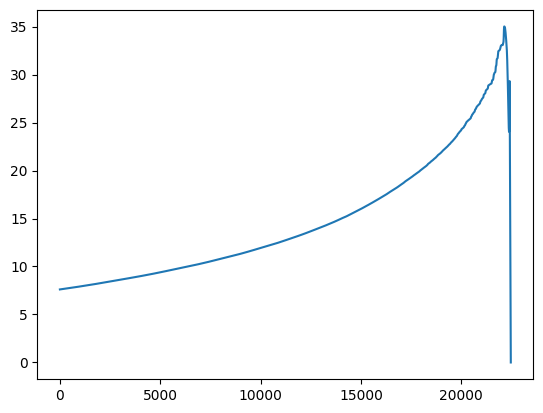

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0,total_vertices),density)

In [ ]:
print(x)

22149


In [ ]:
graph = []
for i in list(neighbors.keys()): # As neighbors.keys() contains all the nodes currently in the graph
    if i not in vertex[:x]: # 0 to x-1 as density[0] was of full graph, so 1...x of denisty is 0...x-1 for vertices
        graph.append(i)
print("Number of nodes in the densest subgraph",len(graph))

Number of nodes in the densest subgraph 321


### Full Graph nodes:

In [ ]:
fullgraph = {}
for ver in list(neighbors.keys()):
    type = df.loc[ver, 'page_type']
    if(type in fullgraph.keys()):
        fullgraph[type] += 1
    else:
        fullgraph[type] = 1

fullgraph

{'tvshow': 3327, 'government': 6880, 'company': 6495, 'politician': 5768}

### Densest Cluster nodes:

In [ ]:
dense1 = {}
for ver in graph:
    type = df.loc[ver, 'page_type']
    if(type in dense1.keys()):
        dense1[type] += 1
    else:
        dense1[type] = 1

print("Node info:",dense1)

Node info: {'government': 257, 'company': 4, 'tvshow': 60}


In [ ]:
df[df['id'].isin(graph)]

,id,facebook_id,page_name,page_type
44,44,1507698529534072,APB FOX,tvshow
127,127,354595427910013,GovX,company
159,159,167394579972573,JRTC and Fort Polk,government
568,568,127428534470290,The Orville,tvshow
679,679,146451038734267,Michigan National Guard,government
...,...,...,...,...
22252,22252,174788155866586,U.S. Army School of Music,government
22265,22265,61575637587,U.S. Pacific Command,government
22328,22328,114802901909136,North Carolina National Guard,government
22349,22349,110318209007293,21st Theater Sustainment Command,government


In [ ]:
entropy=0
for x in dense1.values():
    entropy += -1*(x/sum(dense1.values()))*np.log(x/sum(dense1.values()))
print("Entropy of the densest subgraph:",entropy)

Entropy of the densest subgraph: 0.5461501418344485


### Peeling this densest subgraph from the graph

In [ ]:
edges_df = edges_df[~edges_df.isin(graph).any(axis=1)]

In [ ]:
deg = {}
neighbors = {}
self_loops = {}

for _, row in edges_df.iterrows():
    if row['id_1'] == row['id_2']:
        if row['id_1'] in self_loops:
            self_loops[row['id_1']] += 1
        else:
            self_loops[row['id_1']] = 1

    for node in ['id_1', 'id_2']:
        if row[node] in deg:
            deg[row[node]] += 1
        else:
            deg[row[node]] = 1

    # Append to the neighbors list
    if row['id_1'] in neighbors:
        neighbors[row['id_1']].append(row['id_2'])
    else:
        neighbors[row['id_1']] = [row['id_2']]

    if row['id_2'] in neighbors:
        neighbors[row['id_2']].append(row['id_1'])
    else:
        neighbors[row['id_2']] = [row['id_1']]

## Iteration 2

### Finding the densest subgraph in the remaining graph

In [ ]:
tot = sum(deg.values())/2
print("Number of edges e(S,S) is:",tot) # e(S,S)

ctr = len(deg) # |S|
total_vertices = ctr
print("The total number of vertices in the graph is:",total_vertices)

density = [] # stores densities
vertex = [] # vertex[0:i] (i included) contains vertices removed to achive density[i+1], i+1 as density[0] is for the full graph

density.append(tot/total_vertices) # Density of the full graph
print("Density of the full graph is",density[0])

Number of edges e(S,S) is: 144473.0
The total number of vertices in the graph is: 22094
Density of the full graph is 6.539015117226397


In [ ]:
i = 1
while(ctr>1):
    i+=1
    if (i%1000==0): # Prints i to get an estimate of how much execution is done
        print(i)
    find_density_greedy()
    if(tot != sum(deg.values())/2): # Checks for correctness
        print("here")

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000


In [ ]:
density = np.array(density)
x = np.argmax(density)
print("Densest subgraph has density:",density[x])

graph = []
for i in list(neighbors.keys()):
    if i not in vertex[:x]:
        graph.append(i)
print("Number of nodes in the densest subgraph",len(graph))

dense1 = {}
for ver in graph:
    type = df.loc[ver, 'page_type']
    if(type in dense1.keys()):
        dense1[type] += 1
    else:
        dense1[type] = 1

print("Node info:",dense1)

Densest subgraph has density: 25.42222222222222
Number of nodes in the densest subgraph 90
Node info: {'politician': 7, 'government': 83}


### The densest subgraph is:

In [ ]:
df[df['id'].isin(graph)]

,id,facebook_id,page_name,page_type
173,173,134470763282957,European Union in Israel,government
238,238,160579703997119,European Union in Thailand,government
522,522,479130188842492,União Europeia na Guiné-Bissau,government
710,710,478590035626002,European Union in Mauritius,government
1078,1078,583097918426250,European Union in New Zealand,government
...,...,...,...,...
21211,21211,170400489279,Representação da Comissão Europeia em Portugal,government
21325,21325,492150400807824,Frans Timmermans,politician
21764,21764,340835129292987,European Union in Vietnam,government
22109,22109,283061845058938,Европейската комисия в България / European Com...,government


In [ ]:
entropy=0
for x in dense1.values():
    entropy += -1*(x/sum(dense1.values()))*np.log(x/sum(dense1.values()))
print("Entropy of the densest subgraph:",entropy)

Entropy of the densest subgraph: 0.2733080982135448


### Peeling this densest subgraph from the graph

Removing all edges having a vertex in graph

In [ ]:
edges_df = edges_df[~edges_df.isin(graph).any(axis=1)]

## Iteration 3

### Finding the densest subgraph in the remaining graph

In [ ]:
deg = {}
neighbors = {}
self_loops = {}

for _, row in edges_df.iterrows():
    if row['id_1'] == row['id_2']:
        if row['id_1'] in self_loops:
            self_loops[row['id_1']] += 1
        else:
            self_loops[row['id_1']] = 1

    for node in ['id_1', 'id_2']:
        if row[node] in deg:
            deg[row[node]] += 1
        else:
            deg[row[node]] = 1

    # Append to the neighbors list
    if row['id_1'] in neighbors:
        neighbors[row['id_1']].append(row['id_2'])
    else:
        neighbors[row['id_1']] = [row['id_2']]

    if row['id_2'] in neighbors:
        neighbors[row['id_2']].append(row['id_1'])
    else:
        neighbors[row['id_2']] = [row['id_1']]

In [ ]:
tot = sum(deg.values())/2
print("Number of edges e(S,S) is:",tot) # e(S,S)

ctr = len(deg) # |S|
total_vertices = ctr
print("The total number of vertices in the graph is:",total_vertices)

density = [] # stores densities
vertex = [] # vertex[0:i] (i included) contains vertices removed to achive density[i+1], i+1 as density[0] is for the full graph

density.append(tot/total_vertices) # Density of the full graph
print("Density of the full graph is",density[0])

Number of edges e(S,S) is: 138811.0
The total number of vertices in the graph is: 21996
Density of the full graph is 6.310738316057465


In [ ]:
i = 1
while(ctr>1):
    i+=1
    if (i%1000==0): # Prints i to get an estimate of how much execution is done
        print(i)
    find_density_greedy()
    if(tot != sum(deg.values())/2): # Checks for correctness
        print("here")

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000


In [ ]:
density = np.array(density)
x = np.argmax(density)
print("Densest subgraph has density:",density[x])

graph = []
for i in list(neighbors.keys()):
    if i not in vertex[:x]:
        graph.append(i)
print("Number of nodes in the densest subgraph",len(graph))

dense1 = {}
for ver in graph:
    type = df.loc[ver, 'page_type']
    if(type in dense1.keys()):
        dense1[type] += 1
    else:
        dense1[type] = 1

print("Node info:",dense1)

Densest subgraph has density: 20.42149929278642
Number of nodes in the densest subgraph 707
Node info: {'government': 470, 'company': 3, 'politician': 196, 'tvshow': 38}


### The densest subgraph is:

In [ ]:
df[df['id'].isin(graph)]

,id,facebook_id,page_name,page_type
88,88,70710067457,"United States Embassy - Riga, Latvia",government
106,106,145794842231097,Chad Griffith - Lake Macquarie,politician
187,187,464998863536680,Bill Shorten MP,politician
197,197,1431984283714112,U.S. Forest Service,government
296,296,205572482794329,US National Weather Service Topeka Kansas,government
...,...,...,...,...
22404,22404,419314404818772,Christina Jantz-Herrmann,politician
22405,22405,60367306581,American Center New Delhi,government
22414,22414,720595767983984,Frank Junge,politician
22435,22435,120961761279906,Deborah O'Neill,politician


In [ ]:
entropy=0
for x in dense1.values():
    entropy += -1*(x/sum(dense1.values()))*np.log(x/sum(dense1.values()))
print("Entropy of the densest subgraph:",entropy)

Entropy of the densest subgraph: 0.8073970723241295


### Peeling this densest subgraph from the graph

In [ ]:
edges_df = edges_df[~edges_df.isin(graph).any(axis=1)]

## Iteration 4

### Finding the densest subgraph in the remaining graph

In [ ]:
deg = {}
neighbors = {}
self_loops = {}

for _, row in edges_df.iterrows():
    if row['id_1'] == row['id_2']:
        if row['id_1'] in self_loops:
            self_loops[row['id_1']] += 1
        else:
            self_loops[row['id_1']] = 1

    for node in ['id_1', 'id_2']:
        if row[node] in deg:
            deg[row[node]] += 1
        else:
            deg[row[node]] = 1

    # Append to the neighbors list
    if row['id_1'] in neighbors:
        neighbors[row['id_1']].append(row['id_2'])
    else:
        neighbors[row['id_1']] = [row['id_2']]

    if row['id_2'] in neighbors:
        neighbors[row['id_2']].append(row['id_1'])
    else:
        neighbors[row['id_2']] = [row['id_1']]

In [ ]:
tot = sum(deg.values())/2
print("Number of edges e(S,S) is:",tot) # e(S,S)

ctr = len(deg) # |S|
total_vertices = ctr
print("The total number of vertices in the graph is:",total_vertices)

density = [] # stores densities
vertex = [] # vertex[0:i] (i included) contains vertices removed to achive density[i+1], i+1 as density[0] is for the full graph

density.append(tot/total_vertices) # Density of the full graph
print("Density of the full graph is",density[0])

Number of edges e(S,S) is: 108687.0
The total number of vertices in the graph is: 21186
Density of the full graph is 5.13013310676862


In [ ]:
i = 1
while(ctr>1):
    i+=1
    if (i%1000==0): # Prints i to get an estimate of how much execution is done
        print(i)
    find_density_greedy()
    if(tot != sum(deg.values())/2): # Checks for correctness
        print("here")

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000


In [ ]:
density = np.array(density)
x = np.argmax(density)
print("Densest subgraph has density:",density[x])

graph = []
for i in list(neighbors.keys()):
    if i not in vertex[:x]:
        graph.append(i)
print("Number of nodes in the densest subgraph",len(graph))

dense1 = {}
for ver in graph:
    type = df.loc[ver, 'page_type']
    if(type in dense1.keys()):
        dense1[type] += 1
    else:
        dense1[type] = 1

print("Node info:",dense1)

Densest subgraph has density: 16.980392156862745
Number of nodes in the densest subgraph 51
Node info: {'government': 51}


### The densest subgraph is:

In [ ]:
df[df['id'].isin(graph)]

,id,facebook_id,page_name,page_type
196,196,418893364920895,Préfet de Loir et Cher,government
478,478,1497254630524271,Préfet de la Saône-et-Loire,government
992,992,219953911434100,Préfet de l'Aisne,government
1503,1503,121386187886932,Préfecture de Police,government
1960,1960,105063419566358,Ministère des Sports,government
2405,2405,146054485530564,Ministère de la Cohésion des Territoires,government
2605,2605,149819368364622,Préfet de Meurthe-et-Moselle,government
2644,2644,505487189520312,Préfecture de la Guyane,government
3451,3451,202866606417783,Ministère de la Culture,government
3678,3678,133776633309674,Ministère des Outre-Mer,government


In [ ]:
entropy=0
for x in dense1.values():
    entropy += -1*(x/sum(dense1.values()))*np.log(x/sum(dense1.values()))
print("Entropy of the densest subgraph:",entropy)

Entropy of the densest subgraph: 0.0


### Peeling this densest subgraph from the graph

In [ ]:
edges_df = edges_df[~edges_df.isin(graph).any(axis=1)]

## Iteration 5

### Finding the densest subgraph in the remaining graph

In [ ]:
deg = {}
neighbors = {}
self_loops = {}

for _, row in edges_df.iterrows():
    if row['id_1'] == row['id_2']:
        if row['id_1'] in self_loops:
            self_loops[row['id_1']] += 1
        else:
            self_loops[row['id_1']] = 1

    for node in ['id_1', 'id_2']:
        if row[node] in deg:
            deg[row[node]] += 1
        else:
            deg[row[node]] = 1

    # Append to the neighbors list
    if row['id_1'] in neighbors:
        neighbors[row['id_1']].append(row['id_2'])
    else:
        neighbors[row['id_1']] = [row['id_2']]

    if row['id_2'] in neighbors:
        neighbors[row['id_2']].append(row['id_1'])
    else:
        neighbors[row['id_2']] = [row['id_1']]

In [ ]:
tot = sum(deg.values())/2
print("Number of edges e(S,S) is:",tot) # e(S,S)

ctr = len(deg) # |S|
total_vertices = ctr
print("The total number of vertices in the graph is:",total_vertices)

density = [] # stores densities
vertex = [] # vertex[0:i] (i included) contains vertices removed to achive density[i+1], i+1 as density[0] is for the full graph

density.append(tot/total_vertices) # Density of the full graph
print("Density of the full graph is",density[0])

Number of edges e(S,S) is: 106801.0
The total number of vertices in the graph is: 21129
Density of the full graph is 5.054711533910739


In [ ]:
i = 1
while(ctr>1):
    i+=1
    if (i%1000==0): # Prints i to get an estimate of how much execution is done
        print(i)
    find_density_greedy()
    if(tot != sum(deg.values())/2): # Checks for correctness
        print("here")

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000


In [ ]:
density = np.array(density)
x = np.argmax(density)
print("Densest subgraph has density:",density[x])

graph = []
for i in list(neighbors.keys()):
    if i not in vertex[:x]:
        graph.append(i)
print("Number of nodes in the densest subgraph",len(graph))

dense1 = {}
for ver in graph:
    type = df.loc[ver, 'page_type']
    if(type in dense1.keys()):
        dense1[type] += 1
    else:
        dense1[type] = 1

print("Node info:",dense1)

Densest subgraph has density: 16.004
Number of nodes in the densest subgraph 250
Node info: {'politician': 173, 'government': 77}


### The densest subgraph is:

In [ ]:
df[df['id'].isin(graph)]

,id,facebook_id,page_name,page_type
113,113,404948826259784,Senator James McGrath,politician
290,290,568839896564552,Marie-Claude Bibeau,politician
321,321,325227794269092,"Rachael Harder, MP",politician
702,702,6229329915,Rodger Cuzner,politician
721,721,744295609010223,Murray Thompson MP,politician
...,...,...,...,...
22023,22023,267377223346665,Ministério de Minas e Energia,government
22025,22025,346272215464826,Erin O'Toole,politician
22084,22084,116868855036962,Craig Ondarchie MP,politician
22403,22403,6172639058,Dr. Hedy Fry,politician


In [ ]:
entropy=0
for x in dense1.values():
    entropy += -1*(x/sum(dense1.values()))*np.log(x/sum(dense1.values()))
print("Entropy of the densest subgraph:",entropy)

Entropy of the densest subgraph: 0.6174910645388487
